# Charts and Tables

`matplotlib` can be used to create simple charts (histograms, line charts, etc.). See: https://matplotlib.org/

`pandas` can be used for data frames (tables).

## Create some data

In [93]:
import numpy as np  
import pandas as pd

# create some artificial performance data for 3 agents and 100 runs of a O(n^2) algorithm 
# create data for problem size n = 1 .. 100.
n_max = 100
runtime = {
    "agent 1" : np.abs(np.add(np.power(np.divide(range(n_max), 10), 2), 
                              np.random.normal(loc = 0, scale = 10, size = n_max))),
    "agent 2" : np.abs(np.add(np.power(np.divide(range(n_max),  5), 2), 
                              np.random.normal(loc = 0 , scale = 10, size = n_max))),
    "agent 3" : np.abs(np.add(np.power(np.divide(range(n_max), 12), 2), 
                              np.random.normal(loc = 0 , scale = 10, size = n_max)))
}

# show data as a data frame using pandas
df = pd.DataFrame(runtime)
df

,agent 1,agent 2,agent 3
0,7.325704,2.369879,2.933792
1,6.780901,12.205694,0.199503
2,12.116726,6.581299,13.199310
3,21.086132,6.377929,27.416541
4,2.713940,4.315841,8.608246
...,...,...,...
95,85.322586,361.609354,65.482891
96,101.404656,378.664585,59.282787
97,98.368277,400.994916,73.614638
98,99.682389,369.203484,66.784909


In [94]:
# create data for n = 10 and N = 100 replications, so we can compare distributions.
N = 100
performance = {
    "agent 1" : np.add(100, np.random.normal(loc = 0, scale = 10, size = N)),
    "agent 2" : np.add(120, np.random.normal(loc = 0, scale = 20, size = N)),
    "agent 3" : np.add(70,  np.random.normal(loc = 0, scale =  5, size = N))
}

# show data as a data frame using pandas
df = pd.DataFrame(performance)
df

,agent 1,agent 2,agent 3
0,95.701239,94.498330,65.803503
1,99.922152,111.680400,73.300546
2,94.943873,96.132442,60.597104
3,94.591520,172.113261,73.057522
4,101.003509,122.482081,69.952804
...,...,...,...
95,89.719881,127.254909,69.913533
96,104.075988,120.870298,71.581537
97,94.970492,120.615228,64.948841
98,109.122426,118.313787,64.881135


## Charts 

### Line Charts

Plot run time as a function of problem size $n = 1, ...$. This can be used to compare the runtime and look at scalability. In this example, the run time increase with n by $O(n^2)$. Often, you run each size $n$ several times and average the runtime.

In [95]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")

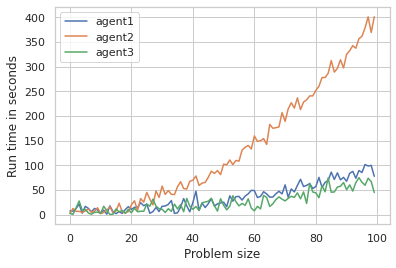

In [96]:
x = range(N)
plt.plot(x, runtime["agent 1"], label = "agent1") 
plt.plot(x, runtime["agent 2"], label = "agent2") 
plt.plot(x, runtime["agent 3"], label = "agent3") 
plt.xlabel("Problem size")
plt.ylabel("Run time in seconds")
plt.legend()
plt.show()

### Scatter plots

Compare $N$ runs of a fixed problem size of $n=10$. Here the runtimes of the two agents are not correlated (because I randomly generated the data). Most of the points are above the diagonal indicating that agent 2 has higher performance.

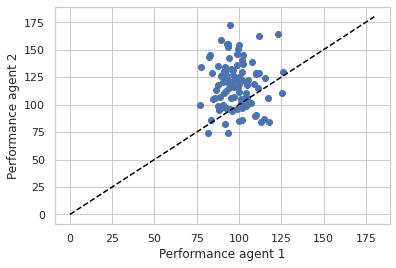

In [97]:
plt.scatter(performance["agent 1"], performance["agent 2"]) 
plt.xlabel("Performance agent 1")
plt.ylabel("Performance agent 2")
plt.plot([0, 180], [0, 180], "--", color = "black")
plt.show()

### Bar plots

Compare the average performance performance.

Mean performance: [ 98.19496411 117.98918475  70.2480007 ]


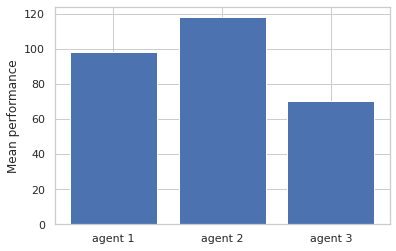

In [98]:
mean_performance = np.mean(list(performance.values()), axis = 1)

print(f"Mean performance: {mean_performance}")

plt.bar(performance.keys(), mean_performance)
plt.ylabel("Mean performance")
plt.show()

### Histograms

Show the distribution of the performance for an agent.

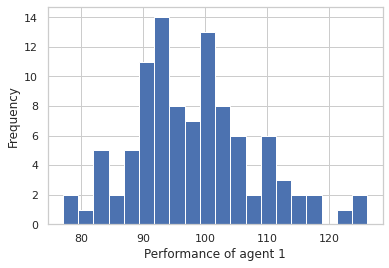

In [99]:
plt.hist(performance["agent 1"], bins = 20)
plt.xlabel("Performance of agent 1")
plt.ylabel("Frequency")
plt.show()

Use histograms to compare the performance distribution between agents.

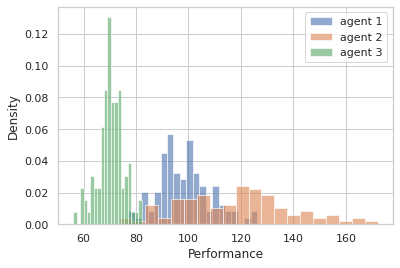

In [100]:
plt.hist(performance["agent 1"], bins = 20, alpha = .6, density=True)
plt.hist(performance["agent 2"], bins = 20, alpha = .6, density=True)
plt.hist(performance["agent 3"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["agent 1", "agent 2", "agent 3"])
plt.show()

### Boxplots

Compares distributions using a simplified representation of the histogram as a box (containing the middle 50% of the data) with wiskers. The notches (cutouts) around the median show the 95% confidence interval around the median. If the notches between two boxes do not overlap, then one is significantly better than the other (at a p-value of 0.05). In this case, agent 2 is significantly better than agent 1. 

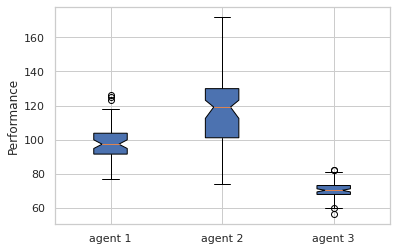

In [101]:
bplot = plt.boxplot(list(performance.values()),
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = performance.keys())  # will be used to label x-ticks
plt.ylabel("Performance")
plt.show()

## Show Tables

Markdown tables can be produced using markdown syntax (see https://www.markdownguide.org/extended-syntax/):

```
| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |
```

Here is the resulting table

| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |

Tables in code can be printed in several ways. The easiest is to use `pandas` dataframes. Unfortunately, it cannot print custom row names.

In [102]:
import numpy as np

data = np.array([[1, 2], [3 ,4], [5, 6]])

print(data)



[[1 2]
 [3 4]
 [5 6]]


In [103]:
import pandas as pd
pd.DataFrame(data, columns=["x", "y"])

,x,y
0,1,2
1,3,4
2,5,6
